In [1]:
# from mylab import *
from deepar.dataset.time_series import MockTs
from deepar.dataset.time_series import TimeSeries
from deepar.model.lstm import DeepAR


%matplotlib inline
from numpy.random import normal
import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# plot simulate transient signal

In [12]:
df = pd.read_csv("./data/瞬态-画图用.csv")
df.head()

,t,I,Vge,Vce
0,0,1.0,0.800,0.10
1,1,1.0,0.800,0.10
2,2,1.0,0.800,0.10
3,3,1.0,0.800,0.10
4,4,1.0,0.785,0.11


In [5]:
from scipy import interpolate

def myInterpolate(x,y,num = 30, method = "cubic"):
    f = interpolate.interp1d(x, y, kind=method)
    x_min = np.min(x)
    x_max = np.max(x)
    nx = np.linspace(x_min, x_max, num)
    ny = f(nx)
    
    return nx,ny

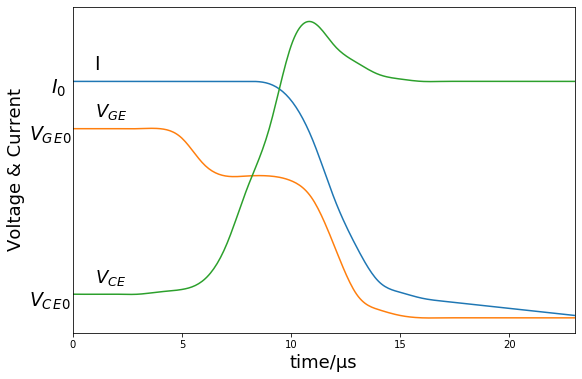

In [95]:
df = pd.read_csv("./data/瞬态-画图用.csv")
plt.figure(figsize = (9,6))
nx,ny = myInterpolate(df.t.values,df.I.values,num = 300, method = "cubic")
plt.plot(nx,ny)
nx,ny = myInterpolate(df.t.values,df.Vge.values,num = 300, method = "cubic")
plt.plot(nx,ny)
nx,ny = myInterpolate(df.t.values,df.Vce.values,num = 300, method = "cubic")
plt.plot(nx,ny)
plt.xlim(0,23)
plt.text(-1,0.95,"${I_0}$ ",fontsize = "19")
plt.text(-2,0.75,"${V_G}$${_E}$${_0}$",fontsize = "19")
plt.text(-2,0.05,"${V_C}$${_E}$${_0}$",fontsize = "19")
plt.text(1,1.05,"I",fontsize = "19")
plt.text(1,0.85,"${V_G}$${_E}$",fontsize = "18")
plt.text(1,0.15,"${V_C}$${_E}$",fontsize = "18")
plt.xlabel("time/μs",fontsize = "18")
plt.text(-3,0.3,"voltage & current",fontsize = "18",rotation = 90)
plt.yticks([])
plt.savefig("./output/paper_plot_transient_ideal.png")

# plot aquired transient signal

In [103]:
df = pd.read_csv("./data/51.csv")
df.head()

,gateSignalVoltage,gateEmitterVoltage,collectorEmitterVoltage,collectorEmitterCurrentSingal
0,-3.072000e-07,-0.156250,3.8125,0.015625
1,-1.562503e-01,-0.156250,3.6875,-0.031250
2,-1.562503e-01,-0.078125,3.7500,0.000000
3,-7.812531e-02,-0.156250,3.8125,0.000000
4,-1.562503e-01,-0.156250,3.6875,0.000000


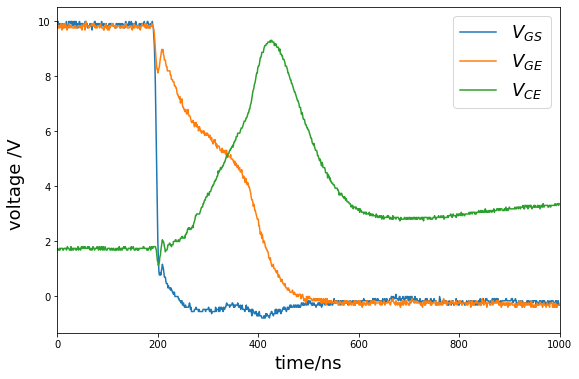

In [128]:
plt.figure(figsize = (9,6))
begin = 41800
end = 42800
plt.plot(df.gateSignalVoltage.values[begin:end],label = "${V_G}$${_S}$")
plt.plot(df.gateEmitterVoltage.values[begin:end],label = "${V_G}$${_E}$")
plt.plot(df.collectorEmitterVoltage.values[begin:end],label = "${V_C}$${_E}$")

plt.xlim(0,end-begin)
# plt.text(-1,0.95,"${I_0}$ ",fontsize = "19")
# plt.text(-2,0.75,"${V_G}$${_E}$${_0}$",fontsize = "19")
# plt.text(-2,0.05,"${V_C}$${_E}$${_0}$",fontsize = "19")
# plt.text(1,1.05,"I",fontsize = "19")
# plt.text(1,0.85,"${V_G}$${_E}$",fontsize = "18")
# plt.text(1,0.15,"${V_C}$${_E}$",fontsize = "18")
plt.xlabel("time/ns",fontsize = "18")
plt.text(-0.1*(end-begin),2.6,"voltage /V",fontsize = "18",rotation = 90)
# plt.yticks([])
plt.legend(fontsize = "18")
plt.savefig("./output/paper_plot_transient_NASA_data.png")

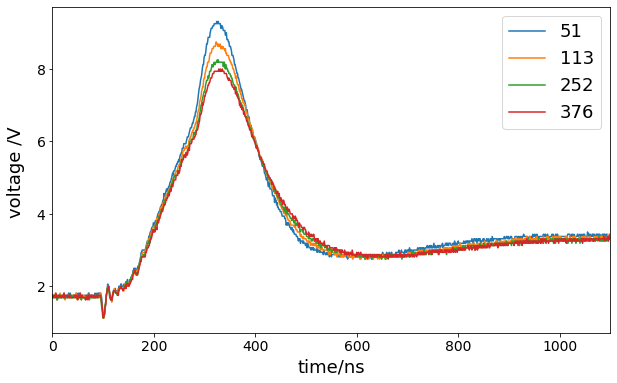

In [154]:
plt.figure(figsize = (10,6))
begin = 41900
end = 43000
df = pd.read_csv("./data/51.csv")
plt.plot(df.collectorEmitterVoltage.values[begin:end],label = "51")
df = pd.read_csv("./data/113.csv")
plt.plot(df.collectorEmitterVoltage.values[begin:end],label = "113")
# df = pd.read_csv("./data/186.csv")
# plt.plot(df.collectorEmitterVoltage.values[begin:end],label = "186")
df = pd.read_csv("./data/252.csv")
plt.plot(df.collectorEmitterVoltage.values[begin:end],label = "252")
# df = pd.read_csv("./data/303.csv")
# plt.plot(df.collectorEmitterVoltage.values[begin:end],label = "303")
df = pd.read_csv("./data/376.csv")
plt.plot(df.collectorEmitterVoltage.values[begin:end],label = "376")
plt.xlim(0,end-begin)
plt.xlabel("time/ns",fontsize = "18")
plt.text(-0.081*(end-begin),4.0,"voltage /V",fontsize = "18",rotation = 90)
plt.legend(fontsize = "18")
plt.tick_params(labelsize=14)
plt.savefig("./output/paper_plot_transient_differant_time.png")

# plot feature

In [158]:
train_df = pd.read_csv('./data/train_feature_df.csv')
print(train_df.shape)
train_df.head()

(418, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
0,-0.234375,9.531250,9.765626,6.751099,6.5625,7.031250,6.171875,8.671875,2.409324,5.804841,...,7.700055,2.426455,0.559720,3.606004,1.233000,7.172011,4.478125,43.976075,47.211104,1
1,-0.312500,9.609375,9.921876,6.669312,5.6250,7.148438,5.312500,8.828125,2.543540,6.469596,...,6.922089,2.859756,0.680050,4.387227,1.180397,6.718276,2.031250,19.946285,124.804264,2
2,-0.312500,9.609375,9.921876,6.631928,9.3750,7.187500,5.000000,8.925781,2.615747,6.842133,...,6.364814,2.655740,0.686635,3.964396,1.134687,6.188391,1.968750,19.387813,178.408544,3
3,-0.312500,9.609375,9.921876,6.625977,9.3750,7.343750,4.843750,8.906250,2.664592,7.100050,...,5.664851,2.441062,0.699543,3.581464,1.097956,5.525323,1.890625,18.589473,215.428544,4
4,-0.312500,9.609375,9.921876,6.607514,9.3750,7.500000,4.687500,8.906250,2.675634,7.159019,...,5.166336,2.334748,0.722006,3.362942,1.063073,5.023016,2.000000,19.609866,244.451166,5


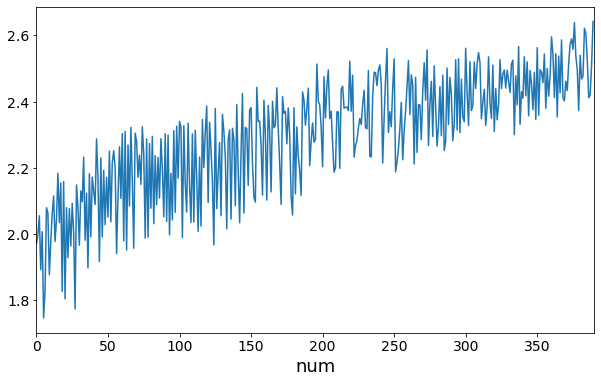

In [167]:
# drop num_cycle < 28
plt.figure(figsize = (10,6))
begin = 28
end = len(train_df)
plt.plot(train_df.down_collectorEmitterVoltage_llr.values[begin:end],label = "llr")
plt.xlim(0,end-begin)
plt.xlabel("num",fontsize = "18")
# plt.text(-0.081*(end-begin),4.0,"voltage /V",fontsize = "18",rotation = 90)
# plt.legend(fontsize = "18")
plt.tick_params(labelsize=14)
plt.savefig("./output/paper_plot_down_collectorEmitterVoltage_llr.png")

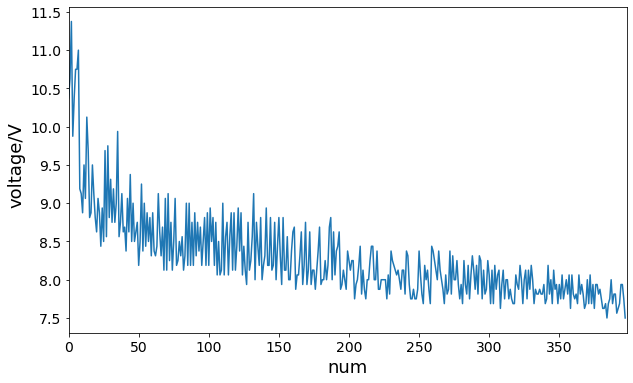

In [166]:
plt.figure(figsize = (10,6))
begin = 20
end = len(train_df)
plt.plot(train_df.down_collectorEmitterVoltage_max.values[begin:end],label = "max")
plt.xlim(0,end-begin)
plt.xlabel("num",fontsize = "18")
plt.text(-0.11*(end-begin),9.0,"voltage/V",fontsize = "18",rotation = 90)
plt.tick_params(labelsize=14)
plt.savefig("./output/paper_plot_down_collectorEmitterVoltage_max.png")

# plot result

In [168]:
train_df = pd.read_csv("./temp/result_filtered.csv")
print(train_df.shape)
train_df.head()

(362, 2)


,ts,ts_filtered
0,2.148368,2.127305
1,2.080417,2.103067
2,1.966582,2.011691
3,2.130172,2.068169
4,2.097866,2.082545


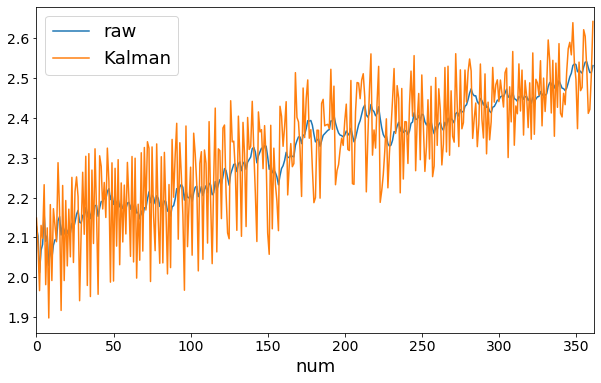

In [174]:
plt.figure(figsize = (10,6))
begin = 0
end = len(train_df)
plt.plot(train_df.ts_filtered.values[begin:end],label = "raw")
plt.plot(train_df.ts.values[begin:end],label = "Kalman")
plt.xlim(0,end-begin)
plt.xlabel("num",fontsize = "18")
# plt.text(-0.11*(end-begin),2.0,"voltage/V",fontsize = "18",rotation = 90)
plt.tick_params(labelsize=14)
plt.legend(fontsize = "18")
plt.savefig("./output/paper_plot_filter.png")

In [176]:
predict_df = pd.read_csv("./output/result_train_DeepAR.csv")
print(predict_df.shape)
predict_df.head()

(311, 6)


,mu,sigma,upper,lower,two_upper,two_lower
0,0.428287,0.050152,0.478439,0.378134,0.528591,0.327982
1,0.421636,0.052459,0.474095,0.369177,0.526554,0.316718
2,0.422880,0.052020,0.474899,0.370860,0.526919,0.318840
3,0.418691,0.053514,0.472205,0.365177,0.525719,0.311663
4,0.421438,0.052529,0.473968,0.368909,0.526497,0.316380


In [181]:
def plot_predict(tot_res):
#     plt.plot(tot_res.mu, 'bo')
    plt.plot(tot_res.mu, linewidth=2)
    plt.fill_between(x = tot_res.index, y1=tot_res.lower, y2=tot_res.upper, alpha=0.5)
    plt.fill_between(x = tot_res.index, y1=tot_res.two_lower, y2=tot_res.two_upper, alpha=0.5)
    plt.title('Prediction uncertainty')
    return 0

No handles with labels found to put in legend.


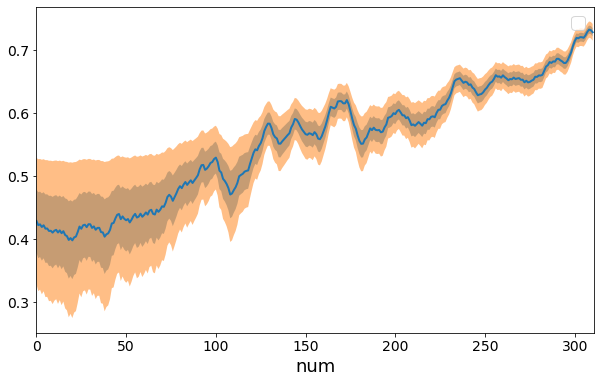

In [196]:
from deepar.myplot import plot_batch
from deepar.myplot import plot_predict
plt.figure(figsize = (10,6))
begin = 0
end = len(predict_df)
plt.plot(predict_df.mu, linewidth=2)
plt.fill_between(x = predict_df.index, y1=predict_df.lower, y2=predict_df.upper, alpha=0.5)
plt.fill_between(x = predict_df.index, y1=predict_df.two_lower, y2=predict_df.two_upper, alpha=0.5)
# plt.plot(np.arange(len(s[TIME_STEPS:])), s[TIME_STEPS:])
plt.xlim(0,end-begin)
plt.xlabel("num",fontsize = "18")
# plt.text(-0.11*(end-begin),2.0,"voltage/V",fontsize = "18",rotation = 90)
plt.tick_params(labelsize=14)
plt.legend(fontsize = "18")
plt.savefig("./output/paper_train_result.png")

In [3]:
import mpl_finance as mpf
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import matplotlib.gridspec as gridspec
import matplotlib as mpl

def plotCandle(daily_df, gs = None ):
    # plot 
    if gs:
        ax1 = plt.subplot(gs[0:6,:])
    else:
        fig, ax1 = plt.subplots(figsize=(16,6))
    mpf.candlestick_ochl(
       ax=ax1,
       quotes=daily_df[['num', 'RUL_lower', 'RUL_upper', 'RUL_2upper', 'RUL_2lower']].values,
       width=0.2,
       colorup='r',
       colordown='g',
       alpha=0.5)

    return 0

No handles with labels found to put in legend.


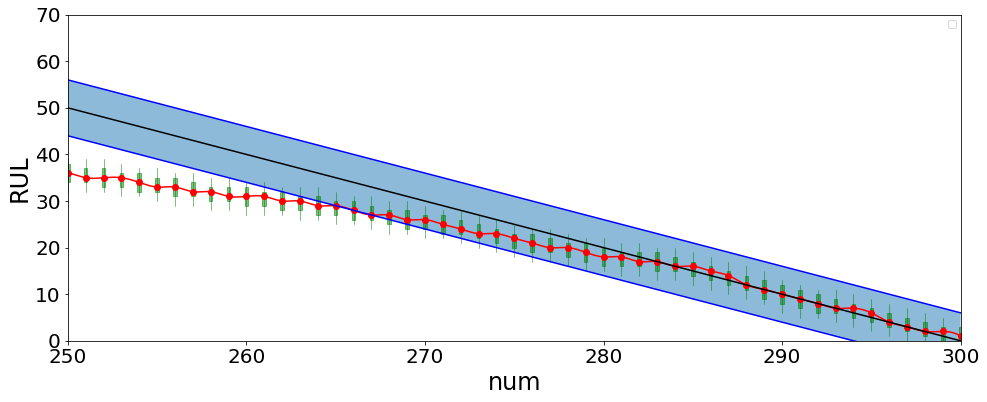

In [39]:
rul_df = pd.read_csv("./output/result_RUL_20200423.csv")
rul_df = rul_df -2
rul_df["num"] = rul_df["num"] -8
# rul_df["RUL"] = rul_df["RUL"] -10
plotCandle(rul_df,  gs = None )
plt.plot(rul_df.num.values,rul_df.RUL_mu.values, "ro", linewidth = 2)
nx,ny = myInterpolate(rul_df.num.values,rul_df.RUL_mu.values,num = 300, method = "cubic")
plt.plot(nx,ny,"r")
plt.plot(rul_df.num.values,rul_df.RUL.values-6, "b-")
plt.plot(rul_df.num.values,rul_df.RUL.values+6, "b-")
plt.plot(rul_df.num.values,rul_df.RUL.values, "black")
plt.fill_between(x = rul_df.num.values, y1=rul_df.RUL.values-6, y2=rul_df.RUL.values+6, alpha=0.5)
# plt.grid(True)
# plt.xticks(rotation=40)
# plt.title("RUL predict")
plt.axis([250,300,0,90])
plt.xlabel("num",fontsize = 24)
plt.ylabel("RUL",fontsize = 24)
plt.tick_params(labelsize=20)
plt.ylim(0,70)
# plt.legend()
plt.savefig("./output/paper_rul_result_DeepAR.png")